#**Q1. Problem Statement: Long Short-Term Memory Networks**

Write a Python program that reads the spam.csv (provided on LMS) file into a DataFrame, where the dataset contains data of different mails and is classified into spam and not spam, the following are the tasks that are to be taken into consideration  while  constructing  LSTM  model,  to  predict  binary  classification using given data:

1.Load the given dataset into a DataFrame (use delimiter as “,” and encoding  as  “latin-1”)  Ex..pd.read_csv('file   name',delimiter='   , ',encoding='latin-1')

2.Drop all “unnamed” columns and do missing value analysis for the remaining columns

3.Use the count plot and check the balance of the target variable (“V1” is our target variable.)

4.Split the datainto X and Y as per independent and dependent variable

5.Do label encoding for the target variable and reshape its array into 2D format

6.Split the data into train and test as a 20% test size

7.Generate tokens (max words = 1000) then convert them into numbers (text to sequence) and do padding as 150 for both train and test data.

8.Create  a  new  function  and  declare  LSTM  and  all  other  layers  of  your model then call this method to create the final RNN model.

9.Fit the final model on the train data set and measure accuracy on thetest dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

**1.Load the given dataset into a DataFrame (use delimiter as “,” and encoding  as  “latin-1”)  Ex..pd.read_csv('file   name',delimiter='   , ',encoding='latin-1')**

In [ ]:
df = pd.read_csv('spam.csv', delimiter=',', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**2.Drop all “unnamed” columns and do missing value analysis for the remaining columns**

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns
df.isnull().sum()

v1    0
v2    0
dtype: int64


**3.Use the count plot and check the balance of the target variable (“V1” is our target variable.)**

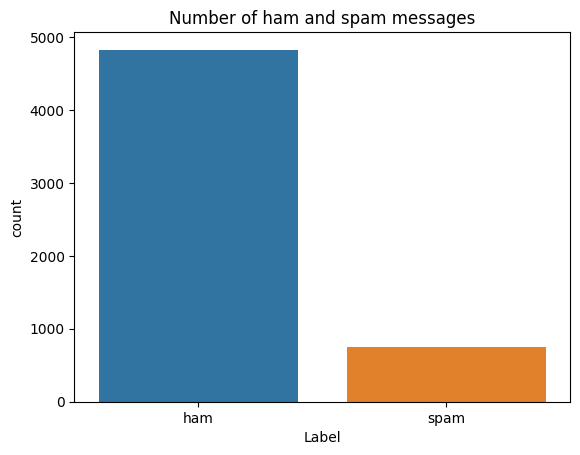

Number of spam mails:  0
Number of not spam mails:  0


In [ ]:
sns.countplot(data=df, x='v1')
plt.xlabel('Label')
plt.title('Number of ham and spam messages')
plt.show()
print("Number of spam mails: ", df[df['v1'] == 1].shape[0])
print("Number of not spam mails: ", df[df['v1'] == 0].shape[0])


**4.Split the datainto X and Y as per independent and dependent variable**

In [ ]:
X = df['v2']
Y = df['v1']


**5.Do label encoding for the target variable and reshape its array into 2D format**

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
Y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])



**6.Split the data into train and test as a 20% test size**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4457,)
(4457, 1)
(1115,)
(1115, 1)




**7.Generate tokens (max words = 1000) then convert them into numbers (text to sequence) and do padding as 150 for both train and test data.**

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)



**8.Create  a  new  function  and  declare  LSTM  and  all  other  layers  of  your model then call this method to create the final RNN model.**

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 150, 50)           50000     
                                                                 
 lstm_10 (LSTM)              (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   




**9.Fit the final model on the train data set and measure accuracy on thetest dataset**

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=32,epochs=20,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/20
112/112 [==============================] - 14s 87ms/step - loss: 0.2089 - accuracy: 0.9296 - val_loss: 0.0619 - val_accuracy: 0.9809
Epoch 2/20
112/112 [==============================] - 10s 90ms/step - loss: 0.0552 - accuracy: 0.9835 - val_loss: 0.0528 - val_accuracy: 0.9888
Epoch 3/20
112/112 [==============================] - 10s 90ms/step - loss: 0.0373 - accuracy: 0.9896 - val_loss: 0.0482 - val_accuracy: 0.9899
Epoch 4/20
112/112 [==============================] - 9s 79ms/step - loss: 0.0306 - accuracy: 0.9924 - val_loss: 0.0750 - val_accuracy: 0.9765


In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 1s 20ms/step - loss: 0.0504 - accuracy: 0.9848


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.050
  Accuracy: 0.985
